In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [6]:
from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/CoLeaf DATASET'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Generate training dataset
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Generate validation dataset
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 809 images belonging to 10 classes.
Found 197 images belonging to 10 classes.


In [7]:
# Load DenseNet121 model without the top layer
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  # 10 categories of leaf disease

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of DenseNet121
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


Epoch 1/10
25/25 [==============================] - 347s 14s/step - loss: 1.9733 - accuracy: 0.3179 - val_loss: 1.8179 - val_accuracy: 0.3854
Epoch 2/10
25/25 [==============================] - 89s 4s/step - loss: 1.4254 - accuracy: 0.5624 - val_loss: 1.6327 - val_accuracy: 0.3906
Epoch 3/10
25/25 [==============================] - 95s 4s/step - loss: 1.1898 - accuracy: 0.6384 - val_loss: 1.5575 - val_accuracy: 0.4635
Epoch 4/10
25/25 [==============================] - 87s 4s/step - loss: 1.0485 - accuracy: 0.6654 - val_loss: 1.5500 - val_accuracy: 0.4531
Epoch 5/10
25/25 [==============================] - 95s 4s/step - loss: 0.9413 - accuracy: 0.7066 - val_loss: 1.5274 - val_accuracy: 0.4688
Epoch 6/10
25/25 [==============================] - 98s 4s/step - loss: 0.8741 - accuracy: 0.7130 - val_loss: 1.5376 - val_accuracy: 0.4479
Epoch 7/10
25/25 [==============================] - 92s 4s/step - loss: 0.8301 - accuracy: 0.7272 - val_loss: 1.5318 - val_accuracy: 0.4635
Epoch 8/10
25/25 [

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')


7/7 [==============================] - 23s 3s/step - loss: 1.4660 - accuracy: 0.4975
Validation Loss: 1.4660229682922363
Validation Accuracy: 0.4974619150161743


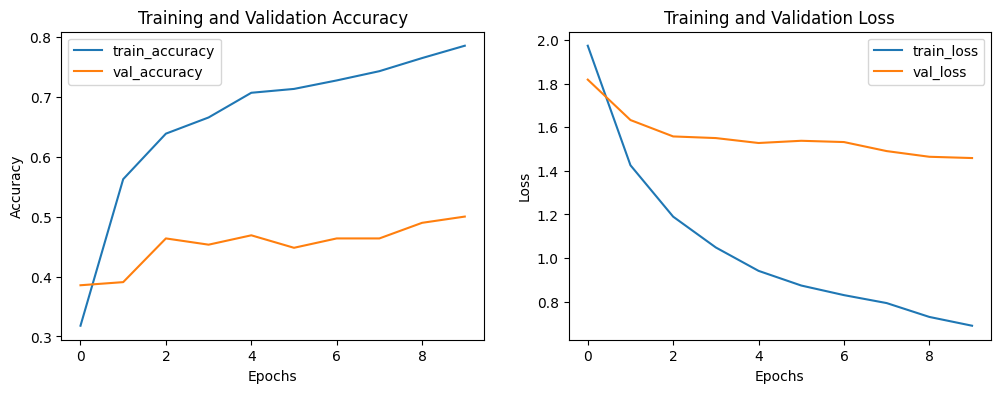

In [10]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [13]:
from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/CoLeaf DATASET'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Generate training dataset
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Generate validation dataset
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 809 images belonging to 10 classes.
Found 197 images belonging to 10 classes.


In [14]:
# Load EfficientNetB0 model without the top layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  # 10 categories of leaf disease

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of EfficientNetB0
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


16705208/16705208 [==============================] - 0s 0us/step


In [15]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


Epoch 1/10
25/25 [==============================] - 103s 4s/step - loss: 2.1826 - accuracy: 0.2072 - val_loss: 2.1280 - val_accuracy: 0.2448
Epoch 2/10
25/25 [==============================] - 89s 4s/step - loss: 2.1380 - accuracy: 0.2458 - val_loss: 2.1096 - val_accuracy: 0.2500
Epoch 3/10
25/25 [==============================] - 94s 4s/step - loss: 2.1414 - accuracy: 0.2432 - val_loss: 2.1131 - val_accuracy: 0.2448
Epoch 4/10
25/25 [==============================] - 92s 4s/step - loss: 2.1389 - accuracy: 0.2252 - val_loss: 2.1086 - val_accuracy: 0.2500
Epoch 5/10
25/25 [==============================] - 87s 3s/step - loss: 2.1317 - accuracy: 0.2471 - val_loss: 2.1142 - val_accuracy: 0.2552
Epoch 6/10
25/25 [==============================] - 111s 5s/step - loss: 2.1322 - accuracy: 0.2458 - val_loss: 2.1153 - val_accuracy: 0.2448
Epoch 7/10
25/25 [==============================] - 85s 3s/step - loss: 2.1376 - accuracy: 0.2278 - val_loss: 2.1074 - val_accuracy: 0.2500
Epoch 8/10
25/25 [

In [16]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')


7/7 [==============================] - 18s 3s/step - loss: 2.1161 - accuracy: 0.2487
Validation Loss: 2.1160786151885986
Validation Accuracy: 0.24873095750808716


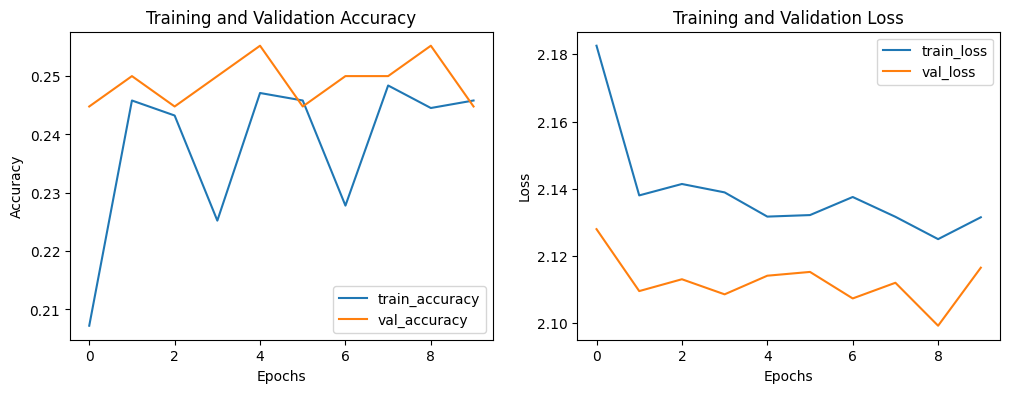

In [17]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


DenseNet121 Model Predictions:
1/1 [==============================] - 1s 1s/step


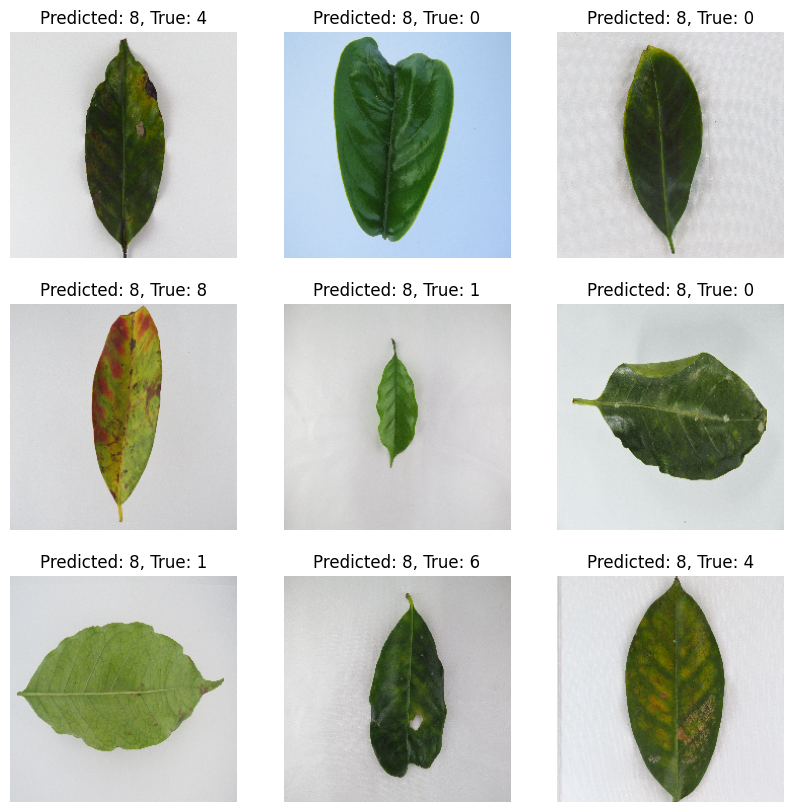

EfficientNetB0 Model Predictions:
1/1 [==============================] - 0s 74ms/step


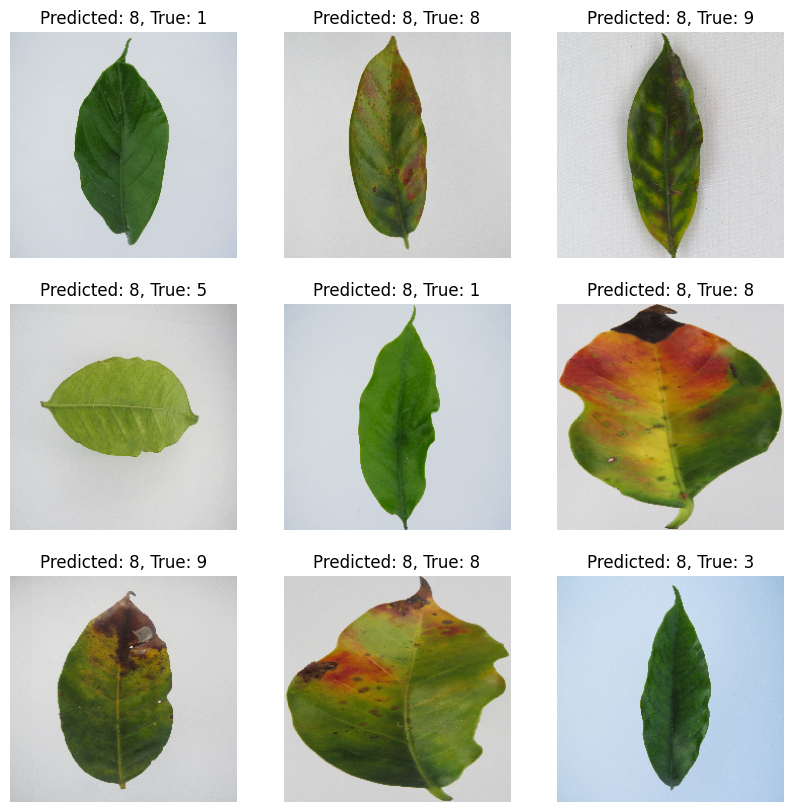

In [24]:
import numpy as np

# Visualize some predictions
def plot_predictions(model, dataset):
    plt.figure(figsize=(10, 10))
    images, labels = dataset.next()
    predictions = model.predict(images)
    for i in range(9):
        plt.subplot(3, 3, i+1)
        image = images[i]
        image = (image * 255).astype(np.uint8)  # Scale back to [0, 255] range
        plt.imshow(image)
        plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {np.argmax(labels[i])}")
        plt.axis("off")
    plt.show()


print("DenseNet121 Model Predictions:")
plot_predictions(model, validation_generator)

print("EfficientNetB0 Model Predictions:")
plot_predictions(model, validation_generator)
